Simulation Parameters:

1. Calculate daily range
2. Set a lower threshold
3. Long entries are when the price closes in the bottom n% of the day's range, defined by the threshold
4. Measure how often this is followed by an upwards move
5. Run the simulation with various thresholds and graph

In [44]:
# import libraries
import yfinance as yf
import datetime
import numpy as np
from matplotlib import pyplot as plt

In [45]:
# define variables
SYMBOL = "^GSPC"
PCT_THRESH = 20

In [46]:
# define date range
START = datetime.datetime(2000, 1, 1)
END = datetime.datetime(2024, 1, 1)
YEARS = (END - START).days / 365.25

In [47]:
# download data
price = yf.download(SYMBOL, start=START, end=END)

price.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000
2023-12-28,4786.439941,4793.299805,4780.979980,4783.350098,4783.350098,2698860000
2023-12-29,4782.879883,4788.430176,4751.990234,4769.830078,4769.830078,3126060000


In [48]:
# drop Volume and Adj Close columns
price = price.drop(['Volume', 'Adj Close'], axis=1)

price.tail()

,Open,High,Low,Close
Date,,,,
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078
2023-12-28,4786.439941,4793.299805,4780.979980,4783.350098
2023-12-29,4782.879883,4788.430176,4751.990234,4769.830078


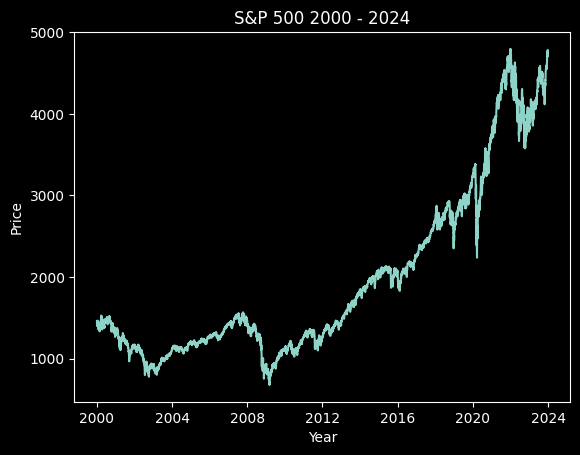

In [49]:
plt.style.use('dark_background')
plt.plot(price.Close)

plt.title('S&P 500 2000 - 2024')
plt.xlabel('Year')
plt.ylabel('Price')

plt.show()

# Calculating Benchmark Return, Daily Range, and Percentage Distance from Close to Low

The following code performs several calculations on a stock price DataFrame, `price`, containing columns such as `Close`, `High`, and `Low` prices. Below are the steps in the process:

1. Benchmark Return Calculation:
   - `Return`: Calculates the daily return as the ratio of the current day's close price to the previous day's close price. 
   - The first entry is manually set to 1 to avoid NaN values due to the lack of a previous day's data.
2. Calculate the daily range = `High` - `Low`
3. Calculate the distance `Dist` = `Close` - `Low`
4. Calculate `Dist` as a percentage `Pct`
   

In [50]:
# calculate benchmark return
price['Return'] = price.Close / price.Close.shift(1)
price.Return.iat[0] = 1

# calculate daily range
price['Range'] = price.High - price.Low

# calculate distance from close to low
price['Dist'] = abs(price.Close - price.Low)

# distance as % of range
price['Pct'] = (price.Dist / price.Range) * 100

price.tail()

,Open,High,Low,Close,Return,Range,Dist,Pct
Date,,,,,,,,
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,1.001660,36.169922,17.859863,49.377666
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,1.004232,26.270020,16.299805,62.047174
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,1.001430,16.490234,12.680176,76.895061
2023-12-28,4786.439941,4793.299805,4780.979980,4783.350098,1.000370,12.319824,2.370117,19.238239
2023-12-29,4782.879883,4788.430176,4751.990234,4769.830078,0.997174,36.439941,17.839844,48.956840


# Trading System: Entry Triggers and System Return Calculation

This section we define entry triggers for a trading system and calculate the system's return based on those triggers.

## 1. Entry Triggers for Long Positions

We define a long entry trigger based on the percentage distance from the close to the day's low. If the percentage distance is less than 20% (`PCT_THRESH`), a long position is triggered.

## 2. System Return Calculation

We calculate the system return `Sys_Ret` by checking if the previous day triggered a long position. If a long position was held on the previous day 

```python 
price.Long.shift(1) == True
```
the system return is equal to the daily return. Otherwise, the system return is set to 1.0 (no gain or loss for that day).

In [51]:
# entry triggers
price['Long'] = price.Pct < PCT_THRESH

# system return
price['Sys_Ret'] = np.where(price.Long.shift(1) == True, price.Return, 1.0)

price.tail()

,Open,High,Low,Close,Return,Range,Dist,Pct,Long,Sys_Ret
Date,,,,,,,,,,
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,1.001660,36.169922,17.859863,49.377666,False,1.000000
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,1.004232,26.270020,16.299805,62.047174,False,1.000000
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,1.001430,16.490234,12.680176,76.895061,False,1.000000
2023-12-28,4786.439941,4793.299805,4780.979980,4783.350098,1.000370,12.319824,2.370117,19.238239,True,1.000000
2023-12-29,4782.879883,4788.430176,4751.990234,4769.830078,0.997174,36.439941,17.839844,48.956840,False,0.997174


# Benchmark and Trading System Winrate Analysis

In this section, we calculate and compare the win rates for both the benchmark and the trading system. 

First, we determine the number of benchmark winning and losing days based on the daily returns. A winning day is defined as a day where the return is greater than 1.0, while a losing day is one where the return is less than 1.0. We then calculate the benchmark win rate as a percentage of winning days out of the total days.

Next, we extract the number of winning and losing days for the trading system, using the system returns. Similarly, we calculate the system win rate as a percentage of winning trades out of the total trades.

Finally, we print the benchmark win rate, the number of winning and losing trades for the trading system, and the system win rate.

In [52]:
# benchmark up and down days
bench_win = price.Return[price.Return > 1.0].count()
bench_loss = price.Return[price.Return < 1.0].count()
bench_winrate = round((bench_win / (bench_win + bench_loss)) * 100, 2)

# extract the up and down days
sys_win = price.Sys_Ret[price.Sys_Ret > 1.0].count()
sys_loss = price.Sys_Ret[price.Sys_Ret < 1.0].count()
sys_winrate = round(sys_win / (sys_win + sys_loss) * 100, 2)

print(f'Benchmark Winrate: {bench_winrate}%')
print('')
print(f'Trade Won: {sys_win}')
print(f'Trade Loss: {sys_loss}')
print(f'System Winrate: {sys_winrate}%')

Benchmark Winrate: 53.47%

Trade Won: 751
Trade Loss: 535
System Winrate: 58.4%


# Trading System Simulation Function

In this section, we define a function called `simulate` that takes in a DataFrame `price` and a `threshold` value. This function calculates entry triggers, system returns, and the win rate of the trading system based on the provided threshold.

The function works as follows:

1. **Entry Triggers**: It creates a new column, `Long`, in the DataFrame, where a long entry is triggered if the percentage distance from the close to the low is less than the specified threshold.

2. **System Return Calculation**: A new column, `Sys_Ret`, is created to calculate the system's return. If a long position was held on the previous day (indicated by `price.Long.shift(1) == True`), the return for that day is taken from the `Return` column. If not, the system return is set to 1.0 (indicating no gain or loss).

3. **Extracting Up and Down Days**: The function counts the number of winning (`sys_win`) and losing (`sys_loss`) days based on the `Sys_Ret` values, and calculates the system win rate as a percentage of winning trades.

Finally, the function returns the system win rate.

In [53]:
def simulate(price, threshold):

    # entry triggers
    price['Long'] = price.Pct < threshold

    # system return
    price['Sys_Ret'] = np.where(price.Long.shift(1) == True, price.Return, 1.0)

    # extract the up and down days
    sys_win = price.Sys_Ret[price.Sys_Ret > 1.0].count()
    sys_loss = price.Sys_Ret[price.Sys_Ret < 1.0].count()
    sys_winrate = round(sys_win / (sys_win + sys_loss) * 100, 2)

    return sys_winrate

# Simulating Trading System for a Range of Thresholds

This section performs a simulation of the trading system over a range of percentage thresholds and stores the results.

1. **Blank List Initialisation**: An empty list, `results`, is initialised to store the win rates for each threshold.

2. **Percentage Threshold Range**: We define a range of percentage values from 5 to 100 using `range(5, 101)`.

3. **Simulation Loop**: For each percentage threshold in the range, we call the `simulate` function (defined earlier) and append the resulting win rate to the `results` list.

In [57]:
# blank list for brackest results
results = []
pct_range = range(5, 101)

for pct in pct_range:
    results.append(simulate(price, pct))

# Plotting Simulation Results vs Benchmark Win Rate

In this section, we visualise the results of the trading system simulations across different percentage thresholds and compare them to the benchmark win rate.

1. **Plotting the Simulation Results**: 
   - `plt.plot(pct_range, results)` creates a line plot where the x-axis represents the percentage thresholds (`pct_range`), and the y-axis represents the system win rates (`results`) generated by the `simulate` function.
   
2. **Benchmark Win Rate Line**: 
   - `plt.hlines(bench_winrate, pct_range[0], pct_range[-1], colors='orange')` adds a horizontal line representing the benchmark win rate (`bench_winrate`). This line spans from the first value in `pct_range` to the last, allowing for a visual comparison between the system's performance and the benchmark.

3. **Displaying the Plot**: 
   - `plt.show()` renders the plot, displaying both the simulation results and the benchmark win rate.


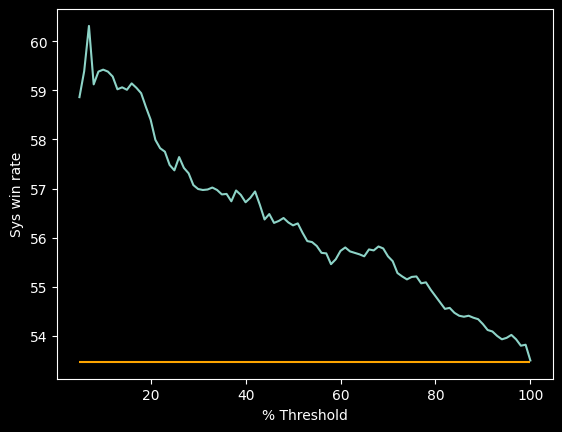

In [58]:
plt.plot(pct_range, results)
plt.hlines(bench_winrate, pct_range[0], pct_range[-1], colors = 'orange')

plt.xlabel('% Threshold')
plt.ylabel('Sys win rate')

plt.show()

In [59]:
print(f'Max Systems Winrate: {max(results)}, at {pct_range[results.index((max(results)))]}')
print(f'Benchmark Winrate: {bench_winrate}')

Max Systems Winrate: 60.31, at 7
Benchmark Winrate: 53.47


# Conclusion

The results indicate that as we lower the system's threshold percentage, the win rate steadily increases. 

From the graph, the highest win rate observed is 60.31% when the threshold is set at 7%. 

Conversely, as the threshold increases—broadening the entry criteria—the system’s performance aligns more closely with the benchmark. The benchmark, represented by the horizontal orange line, reflects the buy-and-hold strategy’s win rate of 53.47%.
